# Mini Neu
### Only Numpy , Pandas , Matplotlib allowed

In this project, you'll build your first neural network and use it to predict daily bike rental ridership. 

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1- Load the "Hours csv" File into a pandas dataframe

In [2]:
data_path = 'Bike-Sharing-Dataset/hour.csv'

rides = pd.read_csv(data_path)

### 2- Show the Head of the Data

In [3]:
rides.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Let me Show you a Peek on the Data 

This dataset has the number of riders for each hour of each day from January 1 2011 to December 31 2012. The number of riders is split between casual and registered, summed up in the `cnt` column. You can see the first few rows of the data above.

Below is a plot showing the number of bike riders over the first 10 days in the data set. You can see the hourly rentals here. This data is pretty complicated! The weekends have lower over all ridership and there are spikes when people are biking to and from work during the week. Looking at the data above, we also have information about temperature, humidity, and windspeed, all of these likely affecting the number of riders. You'll be trying to capture all this with your model.

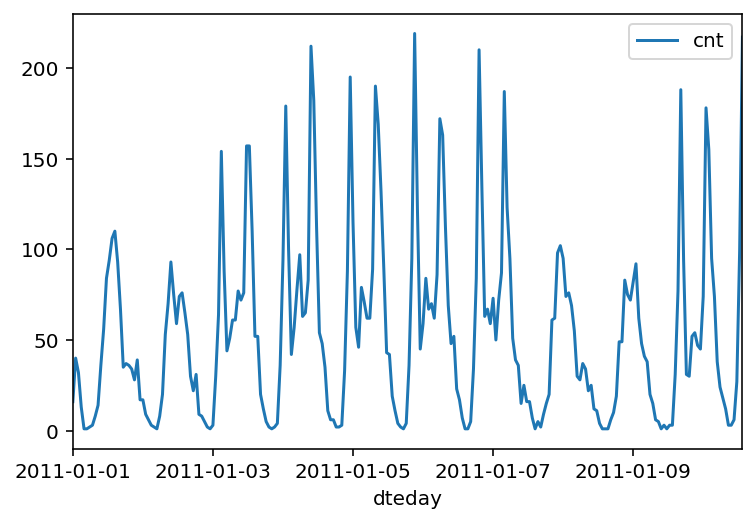

In [4]:
rides[:24*10].plot(x='dteday', y='cnt')

### Dummy variables
Here we have some categorical variables like season, weather, month. To include these in our model, we'll need to make binary dummy variables. This is simple to do with Pandas thanks to `get_dummies()`.

In [5]:
dummy_fields = ['season', 'weathersit', 'mnth', 'hr', 'weekday']
for each in dummy_fields:
    dummies = pd.get_dummies(rides[each], prefix=each, drop_first=False)
    rides = pd.concat([rides, dummies], axis=1)



#### Drop Un Necessary Columns 

In [6]:
rides.corr()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,...,-0.000547,-0.000505,-0.000463,0.000620,-0.003599,-0.001953,0.001103,0.004023,0.002911,-0.003097
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,...,-0.001088,-0.001088,-0.001088,-0.004161,-0.004841,0.010075,0.003338,0.007360,-0.002164,-0.009479
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,...,-0.000496,-0.000496,-0.000496,0.004456,-0.000608,-0.000589,0.000712,0.001375,-0.000614,-0.004723
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,...,-0.001044,-0.001044,-0.001044,-0.006030,-0.006945,-0.002459,0.000718,0.006188,0.006669,0.001861
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,...,0.285880,0.316122,0.346363,0.000498,0.000585,0.004418,-0.001148,0.000548,-0.001112,-0.003750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
weekday_2,-0.001953,0.010075,-0.000589,-0.002459,0.004418,-0.047034,-0.202864,0.268194,0.032255,0.024384,...,0.001027,0.001027,0.001027,-0.166251,-0.165357,1.000000,-0.165201,-0.165046,-0.165668,-0.166638
weekday_3,0.001103,0.003338,0.000712,0.000718,-0.001148,-0.046498,-0.000748,0.269312,0.038481,0.020502,...,-0.000556,-0.000556,-0.000556,-0.167118,-0.166219,-0.165201,1.000000,-0.165906,-0.166532,-0.167508
weekday_4,0.004023,0.007360,0.001375,0.006188,0.000548,-0.022760,0.202235,0.260548,-0.014657,0.021208,...,0.000404,0.000404,0.000404,-0.166960,-0.166063,-0.165046,-0.165906,1.000000,-0.166375,-0.167350
weekday_5,0.002911,-0.002164,-0.000614,0.006669,-0.001112,-0.023151,0.406745,0.261640,-0.008399,-0.001184,...,-0.000147,-0.000147,-0.000147,-0.167590,-0.166689,-0.165668,-0.166532,-0.166375,1.000000,-0.167981


In [7]:
fields_to_drop = ['instant', 'dteday', 'season', 'weathersit', 
                  'weekday', 'atemp', 'mnth', 'workingday', 'hr']
data = rides.drop(fields_to_drop, axis=1)
data.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0,3,13,16,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0.22,0.80,0.0,8,32,40,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0.22,0.80,0.0,5,27,32,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0.24,0.75,0.0,3,10,13,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0.24,0.75,0.0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1


#### Show Cleaned Data 

### Scaling target variables
To make training the network easier, we'll standardize each of the continuous variables. That is, we'll shift and scale the variables such that they have zero mean and a standard deviation of 1.

The scaling factors are saved so we can go backwards when we use the network for predictions.

In [8]:
quant_features = ['casual', 'registered', 'cnt', 'temp', 'hum', 'windspeed']
# Store scalings in a dictionary so we can convert back later
scaled_features = {}
for each in quant_features:
    mean, std = data[each].mean(), data[each].std()
    scaled_features[each] = [mean, std]
    data.loc[:, each] = (data[each] - mean)/std

#### Splitting the data into training, testing, and validation sets

We'll save the last 21 days of the data to use as a test set after we've trained the network. We'll use this set to make predictions and compare them with the actual number of riders.

In [9]:
# Save the last 21 days 
test_data = data[-21*24:]
data = data[:-21*24]

# Separate the data into features and targets
target_fields = ['cnt', 'casual', 'registered']
features, targets = data.drop(target_fields, axis=1), data[target_fields]
test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target_fields]

We'll split the data into two sets, one for training and one for validating as the network is being trained. Since this is time series data, we'll train on historical data, then try to predict on future data (the validation set).

In [10]:
# Hold out the last 60 days of the remaining data as a validation set
train_features, train_targets = features[:-60*24], targets[:-60*24]
val_features, val_targets = features[-60*24:], targets[-60*24:]

## Time to build the network

Below, you have these tasks:
1. Implement the sigmoid function to use as the activation function. Set `self.activation_function` in `__init__` to your sigmoid function.
2. Implement the forward pass in the `train` method.
3. Implement the backpropagation algorithm in the `train` method, including calculating the output error.
4. Implement the forward pass in the `run` method.
  

In [11]:
# Hint save it for later
# From List To 2D Array
a = np.array([1,2,3,4], ndmin=2).T
a

array([[1],
       [2],
       [3],
       [4]])

#### Build Sigmoid Function

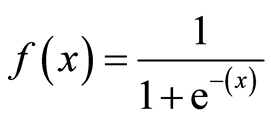

In [12]:
def sigmoid(x):
    return 1/(1+np.exp(-(x)))

In [13]:
#Test it 
x= 0.9
sigmoid(0.9)
# Output should be 0.622 for X = 0.5
# Output should be 0.71 for X = 0.9

0.7109495026250039

In [14]:
class NeuralNetwork(object):
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        
        
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights
        self.weights_input_to_hidden = np.random.normal(0.0, self.hidden_nodes**-0.5, 
                                       (self.hidden_nodes, self.input_nodes))

        self.weights_hidden_to_output = np.random.normal(0.0, self.output_nodes**-0.5, 
                                       (self.output_nodes, self.hidden_nodes))
        self.lr = learning_rate
        
        #### Set this to your implemented sigmoid function ####
        # Activation function is the sigmoid function
        self.activation_function = sigmoid
    
    def train(self, inputs_list, targets_list):
        # Convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        #### Implement the forward pass here ####
        ### Forward pass ###
        # TODO: Hidden layer
        hidden_inputs = np.dot((self.weights_input_to_hidden),inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # TODO: Output layer
        final_inputs = np.dot((self.weights_hidden_to_output), hidden_outputs)
        final_outputs = final_inputs
        
        #### Implement the backward pass here ####
        ### Backward pass ###
        
        #TODO: Output error
        output_errors = targets - final_outputs
        
        # TODO: Backpropagated error
        hidden_errors = np.dot(self.weights_hidden_to_output.T, output_errors)
        hidden_grad = hidden_errors *  ((hidden_outputs)*(1-hidden_outputs))
        
        # TODO: Update the weights
        self.weights_hidden_to_output += (self.lr) * (hidden_outputs.T *  output_errors)
        self.weights_input_to_hidden += (self.lr) * (( inputs.T * hidden_grad))
 
        
    def run(self, inputs_list):
        # Run a forward pass through the network
        inputs = np.array(inputs_list, ndmin=2).T
        
        #### Implement the forward pass here ####
        # TODO: Hidden layer
        hidden_inputs = np.dot((self.weights_input_to_hidden), inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # TODO: Output layer
        final_inputs = np.dot((self.weights_hidden_to_output), hidden_outputs)
        final_outputs = final_inputs
        
        return final_outputs

In [15]:
def MSE(y, Y):
    return np.mean((y-Y)**2)

## Training the network

In [16]:
import sys

### Set the hyperparameters here ###
epochs = 5000
learning_rate = 0.01
hidden_nodes = 30
output_nodes = 1

In [17]:
N_i = train_features.shape[1]
network = NeuralNetwork(N_i, hidden_nodes, output_nodes, learning_rate)

losses = {'train':[], 'validation':[]}
for e in range(epochs):
    # Go through a random batch of 128 records from the training data set
    batch = np.random.choice(train_features.index, size=128)
    for record, target in zip(train_features.loc[batch].values, 
                              train_targets.loc[batch]['cnt']):
        network.train(record, target)
    
    # Printing out the training progress
    train_loss = MSE(network.run(train_features), train_targets['cnt'].values)
    val_loss = MSE(network.run(val_features), val_targets['cnt'].values)
    sys.stdout.write("\rProgress: " + str(100 * e/float(epochs))[:4] \
                     + "% ... Training loss: " + str(train_loss)[:5] \
                     + " ... Validation loss: " + str(val_loss)[:5])
    
    losses['train'].append(train_loss)
    losses['validation'].append(val_loss)
print("Finished training.")

Progress: 99.9% ... Training loss: 0.057 ... Validation loss: 0.189Finished training.


(-0.0036209531366538164, 2)

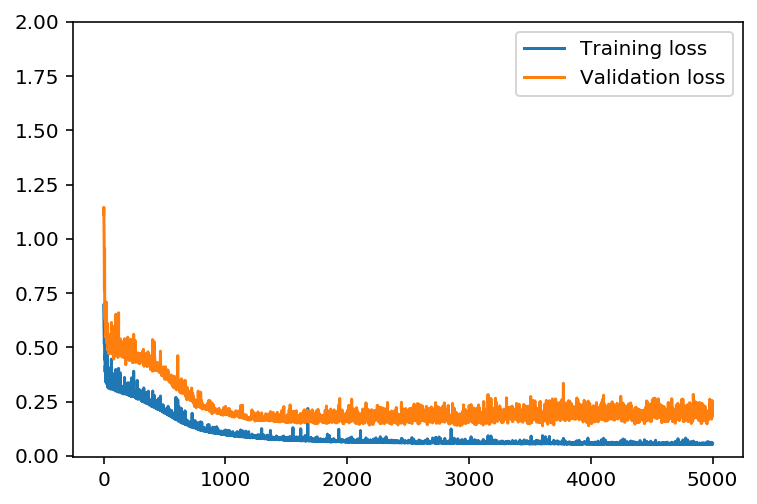

In [18]:
plt.plot(losses['train'], label='Training loss')
plt.plot(losses['validation'], label='Validation loss')
plt.legend()
plt.ylim(ymax=2)

## Check out your predictions

Here, use the test data to view how well your network is modeling the data. If something is completely wrong here, make sure each step in your network is implemented correctly.

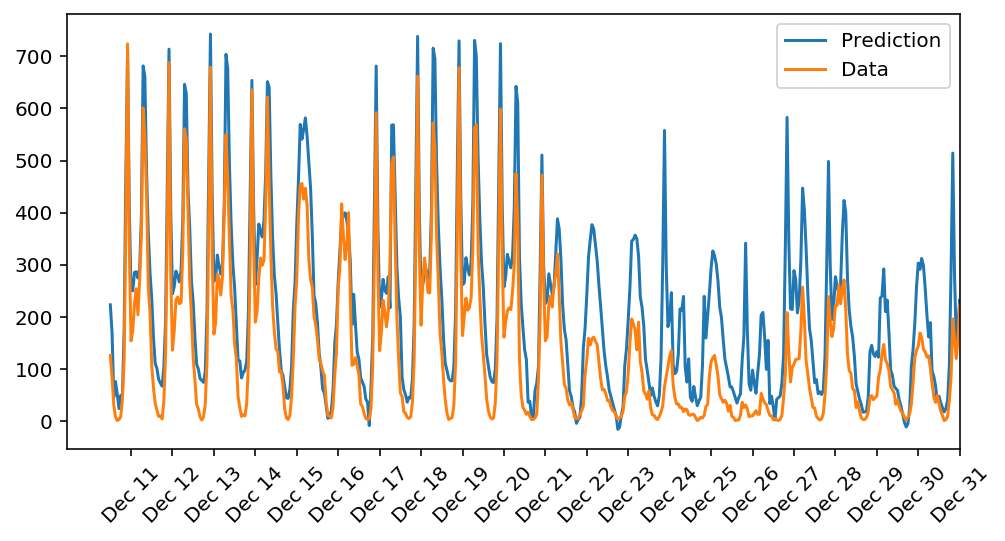

In [19]:
fig, ax = plt.subplots(figsize=(8,4))

mean, std = scaled_features['cnt']
predictions = network.run(test_features)*std + mean
ax.plot(predictions[0], label='Prediction')
ax.plot((test_targets['cnt']*std + mean).values, label='Data')
ax.set_xlim(right=len(predictions))
ax.legend()

dates = pd.to_datetime(rides.loc[test_data.index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)